# Ноутбук к уроку 3. Продвинутые расчеты и визуализация

In [1]:
import pandas as pd
import numpy as np

## Сводные таблицы

In [2]:
air_quality = pd.read_csv("air_quality_long.csv",
                          index_col="date.utc",
                          parse_dates=True)

In [3]:
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


In [4]:
no2 = air_quality.loc[air_quality["parameter"] == "no2"]

In [5]:
no2_subset = no2.sort_index().groupby(["location"]).head(2)
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


#### pivot - просто преобразование формы

![pivot](https://storage.yandexcloud.net/klms-public/production/learning-content/10/56/404/1098/5293/6_pivot.png)

In [6]:
no2_subset.pivot(columns="location", values="value")

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


In [7]:
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


Нарисуем график с помощью метода `plot()` из pandas

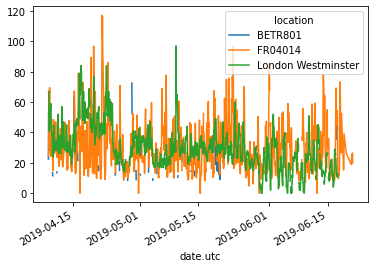

In [8]:
no2.pivot(columns="location", values="value").plot()

### Сводные таблицы с агрегацией

In [9]:
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


#### pivot_table - для агрегации

In [10]:
air_quality.pivot_table(
    # числовое значениче для агрегации
    values="value",

    # строки
    index="location",

    # столбцы
    columns="parameter",

    # тип агрегации
    aggfunc="mean")

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


In [11]:
air_quality.pivot_table(values="value",
                        index="location",
                        columns="parameter",
                        aggfunc="mean",
                        margins=True)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


## Объединение датафреймов

1. По осям – горизонтально и вертикально
2. Concat, append, join, merge – много дублирования функционала

In [12]:
air_quality_no2 = pd.read_csv("air_quality_no2_long.csv",
                              parse_dates=True)

In [13]:
air_quality_no2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [14]:
columns = ["date.utc", "location", "parameter", "value"]

In [15]:
air_quality_no2 = air_quality_no2[columns]
air_quality_no2.head()

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4


In [16]:
air_quality_pm25 = pd.read_csv("air_quality_pm25_long.csv",
                               parse_dates=True)

air_quality_pm25 = air_quality_pm25[columns]

air_quality_pm25.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


#### pd.concat

In [17]:
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)
air_quality.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


In [18]:
print(f'Shape "air_quality_pm25": {air_quality_pm25.shape}')
print(f'Shape "air_quality_no2": {air_quality_no2.shape}')
print(f'Shape результата "air_quality": {air_quality.shape}')

Shape "air_quality_pm25": (1110, 4)
Shape "air_quality_no2": (2068, 4)
Shape результата "air_quality": (3178, 4)


![concat](https://storage.yandexcloud.net/klms-public/production/learning-content/10/56/404/1098/5293/6_concat.png)

In [19]:
air_quality_ = pd.concat([air_quality_pm25, air_quality_no2],
                         keys=["PM25", "NO2"])
air_quality_.head()

date.utc location parameter  value
PM25 0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0
     1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5
     2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5
     3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0
     4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5

#### Объединение по ключу
- Аналог join в SQL
- pd.merge

![join](https://storage.yandexcloud.net/klms-public/production/learning-content/10/56/404/1098/5293/6_join.png)

In [20]:
stations_coord = pd.read_csv("air_quality_stations.csv")
stations_coord.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


In [21]:
air_quality = pd.merge(air_quality, stations_coord,
                       how='left',
                       on='location')
air_quality.head()

,date.utc,location,parameter,value,coordinates.latitude,coordinates.longitude
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,51.20966,4.43182
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,51.20966,4.43182
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,51.20966,4.43182
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,51.20966,4.43182
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,51.20966,4.43182


In [22]:
air_quality_parameters = pd.read_csv("air_quality_parameters.csv")
air_quality_parameters.head()

,id,description,name
0,bc,Black Carbon,BC
1,co,Carbon Monoxide,CO
2,no2,Nitrogen Dioxide,NO2
3,o3,Ozone,O3
4,pm10,Particulate matter less than 10 micrometers in...,PM10


In [23]:
air_quality = pd.merge(air_quality, air_quality_parameters,
                       how='left',
                       left_on='parameter', right_on='id')
air_quality.head()

,date.utc,location,parameter,value,coordinates.latitude,coordinates.longitude,id,description,name
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5


#### Одинаковые названия колонок

![join](https://storage.yandexcloud.net/klms-public/production/learning-content/10/56/404/1098/5293/6_join_suffix.png)

## Визуализация

Внешний вид графиков может незначительно отличаться от показанного в видео, потому что в разных версиях библиотеки одинаковые функции и параметры могут давать разный результат.

### matplotlib

In [24]:
import matplotlib.pyplot as plt

- Библиотека для визуализации данных
- Легкий базовый функционал и сложные кастомные настройки
- Рекомендуется использование pyplot
- Множество типов графиков: гистограммы, точечные, barplot, etc

![mpl](https://storage.yandexcloud.net/klms-public/production/learning-content/10/56/404/1098/4741/6_mpl.jpg)

Объекты:
- Figure
- Axes

In [25]:
# пустая фигура без осей
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

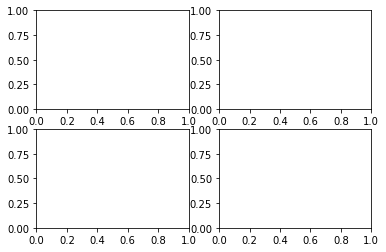

In [26]:
# figure с объектами осей 2x2
fig, ax_lst = plt.subplots(2, 2)

Нарисуем просто линию:

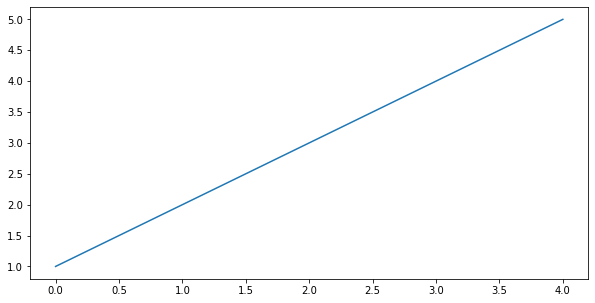

In [27]:
# пустая фигура без осей
fig = plt.figure(figsize=(10, 5))

# только аргумент для у
plt.plot([1, 2, 3, 4, 5])

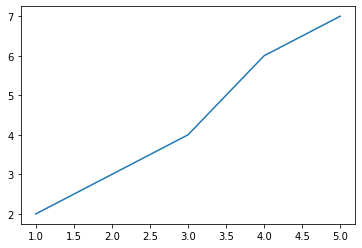

In [28]:
# используем аргументы для х и у
plt.plot([1, 2, 3, 4, 5], [2, 3, 4, 6, 7])

In [29]:
x = [1, 2, 3, 4, 5]
y = [2, 3, 4, 6, 7]

Text(0.5, 1.0, 'Линейная зависимость y от x')

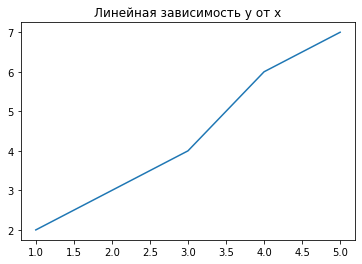

In [30]:
# построение графика
plt.plot(x, y)
# заголовок
plt.title("Линейная зависимость y от x")

Text(0, 0.5, 'y')

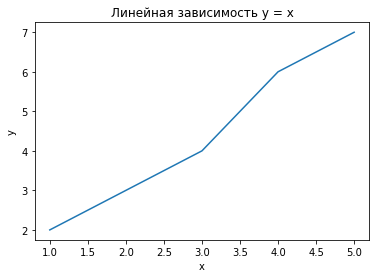

In [31]:
# построение графика
plt.plot(x, y)

# заголовок
plt.title("Линейная зависимость y = x")

# ось абсцисс
plt.xlabel("x")
# ось ординат
plt.ylabel("y")

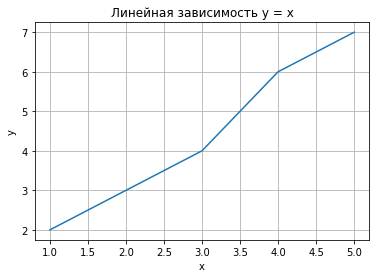

In [32]:
# построение графика
plt.plot(x, y)
# заголовок
plt.title("Линейная зависимость y = x")
# ось абсцисс
plt.xlabel("x")
# ось ординат
plt.ylabel("y")
# включение отображение сетки
plt.grid()

#### Форматирование

![format](https://storage.yandexcloud.net/klms-public/production/learning-content/10/56/404/1098/4741/6_format.png)

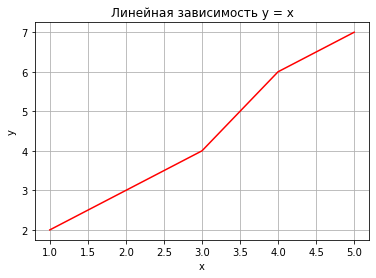

In [33]:
# построение графика
plt.plot(x, y, 'r')
# заголовок
plt.title("Линейная зависимость y = x")
# ось абсцисс
plt.xlabel("x")
# ось ординат
plt.ylabel("y")
# включение отображение сетки
plt.grid()

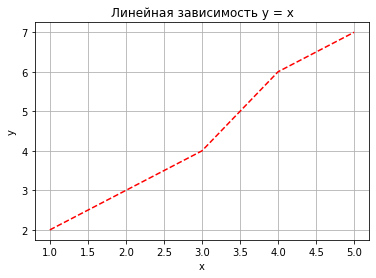

In [34]:
# построение графика
plt.plot(x, y, 'r--')
# заголовок
plt.title("Линейная зависимость y = x")
# ось абсцисс
plt.xlabel("x")
# ось ординат
plt.ylabel("y")
# включение отображение сетки
plt.grid()

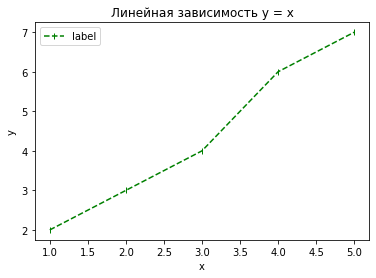

In [35]:
# построение графика
plt.plot(x, y, '|--g', label='label')
# заголовок
plt.title("Линейная зависимость y = x")
# ось абсцисс
plt.xlabel("x")
# ось ординат
plt.ylabel("y")

# добавляем легенду
plt.legend()

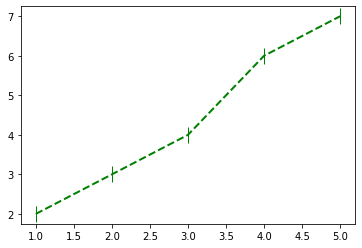

In [36]:
# другие аргументы в plot
plt.plot(x, y, 'g|--', linewidth=2, markersize=16)

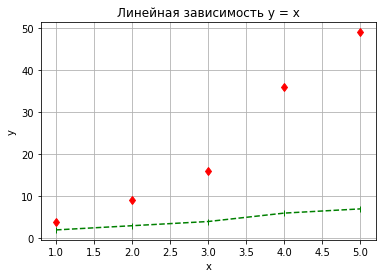

In [37]:
y2 = np.power(y, 2)

# построение графика
plt.plot(x, y, '|--g', x, y2, 'rd')
# заголовок
plt.title("Линейная зависимость y = x")
# ось абсцисс
plt.xlabel("x")
# ось ординат
plt.ylabel("y")
# включение отображение сетки
plt.grid()

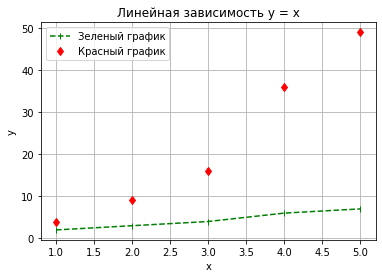

In [38]:
# построение графика
plt.plot(x, y, '|--g', label='Зеленый график')
plt.plot(x, y2, 'rd', label='Красный график')
# заголовок
plt.title("Линейная зависимость y = x")
# ось абсцисс
plt.xlabel("x")
# ось ординат
plt.ylabel("y")
# включение отображение сетки
plt.grid()
# добавляем легенду
plt.legend()

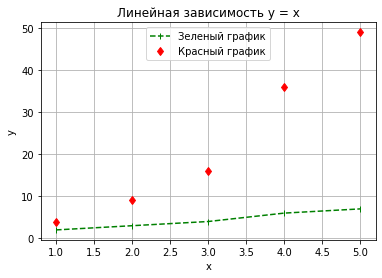

In [39]:
# построение графика
plt.plot(x, y, '|--g', label='Зеленый график')
plt.plot(x, y2, 'rd', label='Красный график')
# заголовок
plt.title("Линейная зависимость y = x")
# ось абсцисс
plt.xlabel("x")
# ось ординат
plt.ylabel("y")
# включение отображение сетки
plt.grid()
# добавляем легенду
plt.legend(loc='upper center')

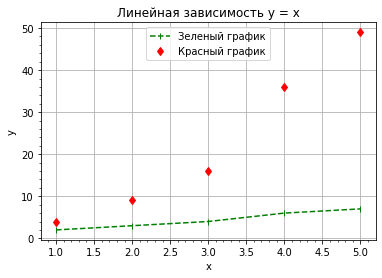

In [40]:
# построение графика
plt.plot(x, y, '|--g', label='Зеленый график')
plt.plot(x, y2, 'rd', label='Красный график')
# заголовок
plt.title("Линейная зависимость y = x")
# ось абсцисс
plt.xlabel("x")
# ось ординат
plt.ylabel("y")
# включение отображение сетки
plt.grid()
# добавляем легенду
plt.legend(loc='upper center')
# добавляем мелкие отсечки
plt.minorticks_on()

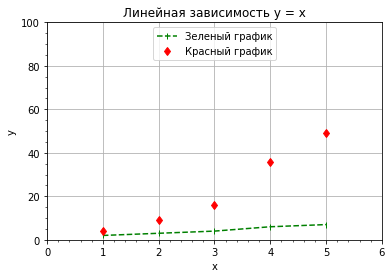

In [41]:
plt.axis([0, 6, 0, 100])

# построение графика
plt.plot(x, y, '|--g', label='Зеленый график')
plt.plot(x, y2, 'rd', label='Красный график')
# заголовок
plt.title("Линейная зависимость y = x")
# ось абсцисс
plt.xlabel("x")
# ось ординат
plt.ylabel("y")
# включение отображение сетки
plt.grid()
# добавляем легенду
plt.legend(loc='upper center')
# добавляем мелкие отсечки
plt.minorticks_on()

#### Другие типы графиков

In [42]:
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

Горизонтальный барплот:

<BarContainer object of 10 artists>

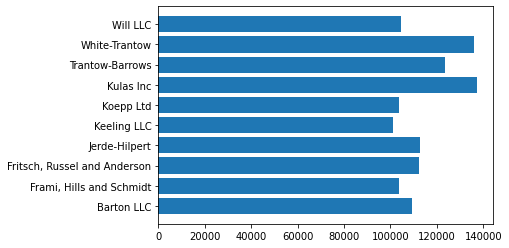

In [43]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

Гистограмма:

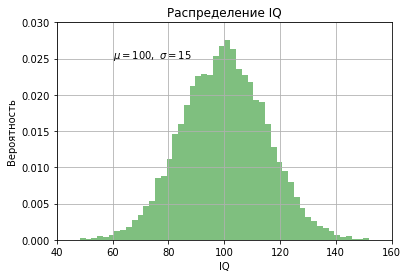

In [44]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.5)

plt.xlabel('IQ')
plt.ylabel('Вероятность')
plt.title('Распределение IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid()

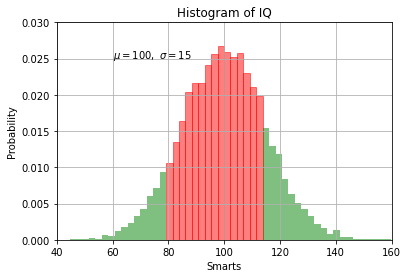

In [45]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.5)
for patch in patches[15:30]:
    patch.set_color('r')

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid()

Типы графиков
- `.plot()` – линейные
- `.scatter()` – точечные
- `.bar()` – столбчатые
- `.hist()` – гистограммы
- `.boxplot()` – ящик с усами
- `.violinplot()` – violinplot :)

#### Рисование через subplots

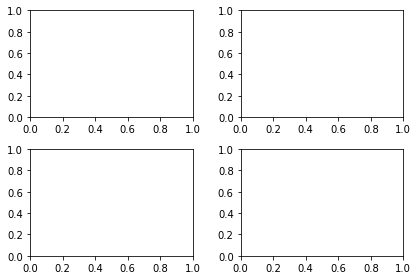

In [46]:
# figure c объектами осей 2*2 и красивыми отступами
fig, ax_lst = plt.subplots(2, 2)
plt.tight_layout()

Text(4, -1.5, 'Текст: 4x-1.5')

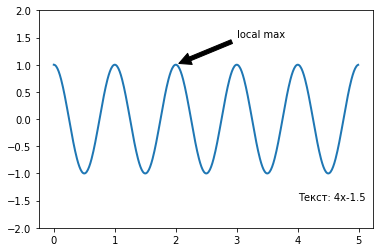

In [47]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.ylim(-2, 2)
plt.text(4, -1.5, 'Текст: 4x-1.5')

In [48]:
y1 = np.array(x)
y2 = np.square(x)

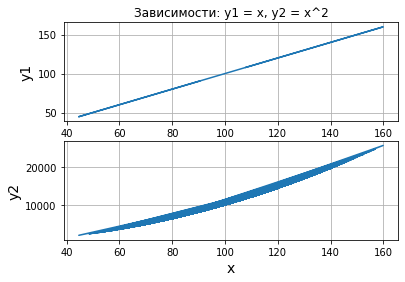

In [49]:
plt.subplot(2, 1, 1)
# построение графика
plt.plot(x, y1)
# заголовок
plt.title("Зависимости: y1 = x, y2 = x^2")
# ось ординат
plt.ylabel("y1", fontsize=14)
# включение отображение сетки
plt.grid(True)

plt.subplot(2, 1, 2)
# построение графика
plt.plot(x, y2)
# ось абсцисс
plt.xlabel("x", fontsize=14)
# ось ординат
plt.ylabel("y2", fontsize=14)
# включение отображение сетки
plt.grid(True)

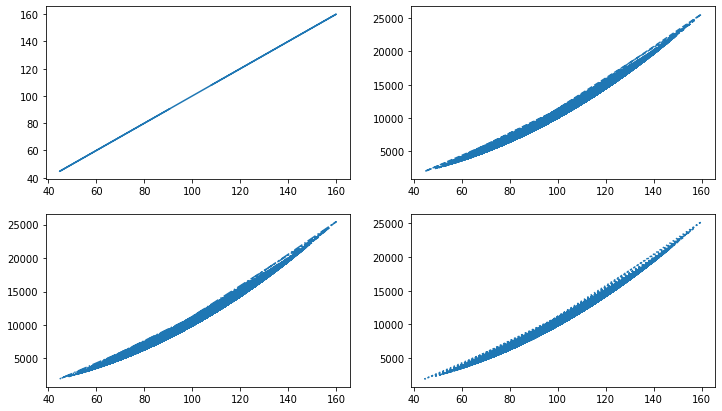

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(12, 7))
axs[0, 0].plot(x, y1, '-')
axs[0, 1].plot(x, y2, '--')
axs[1, 0].plot(x, y2 - y1, '-.')
axs[1, 1].plot(x, y2 - 2 * y1, ':')

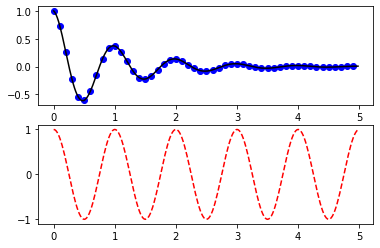

In [51]:
def f(t):
    return np.exp(-t) * np.cos(2 * np.pi * t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2 * np.pi * t2), 'r--')
plt.show()

### gridspec

![gridspec](https://storage.yandexcloud.net/klms-public/production/learning-content/10/56/404/1098/4741/6_gridspec.png)

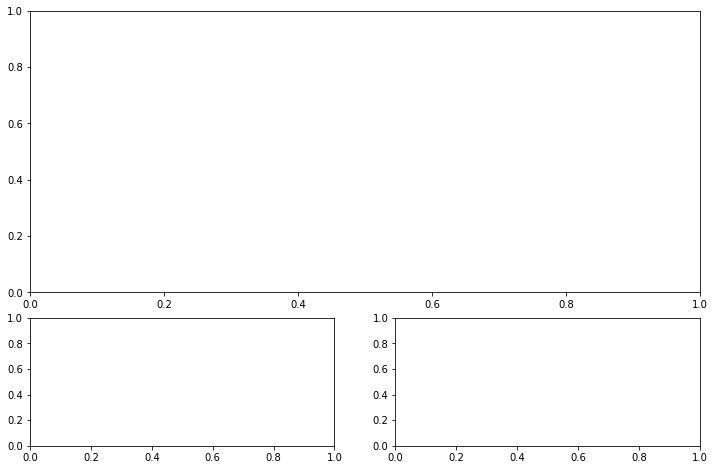

In [52]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

## seaborn

In [53]:
import seaborn as sns

In [54]:
penguins = sns.load_dataset("penguins")

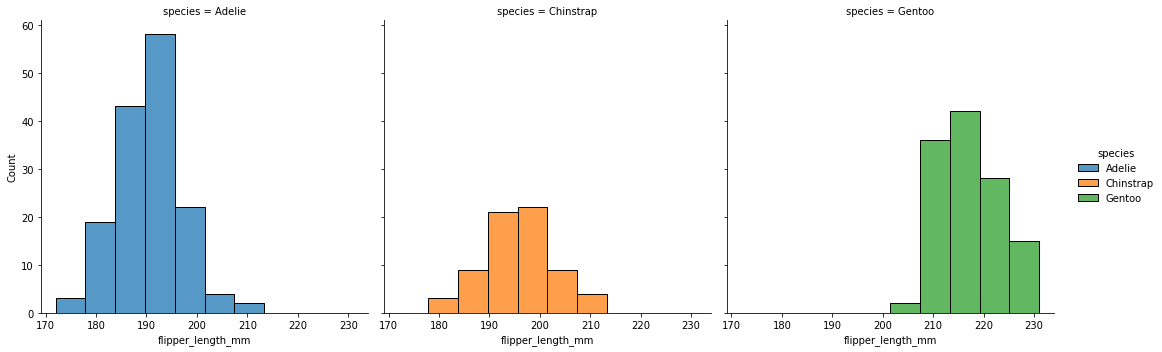

In [55]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

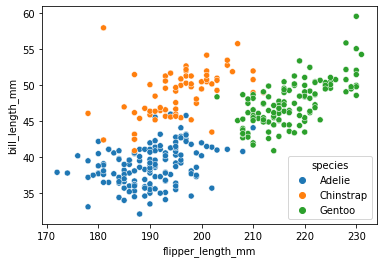

In [56]:
sns.scatterplot(data=penguins,
                x="flipper_length_mm", y="bill_length_mm",
                hue="species")

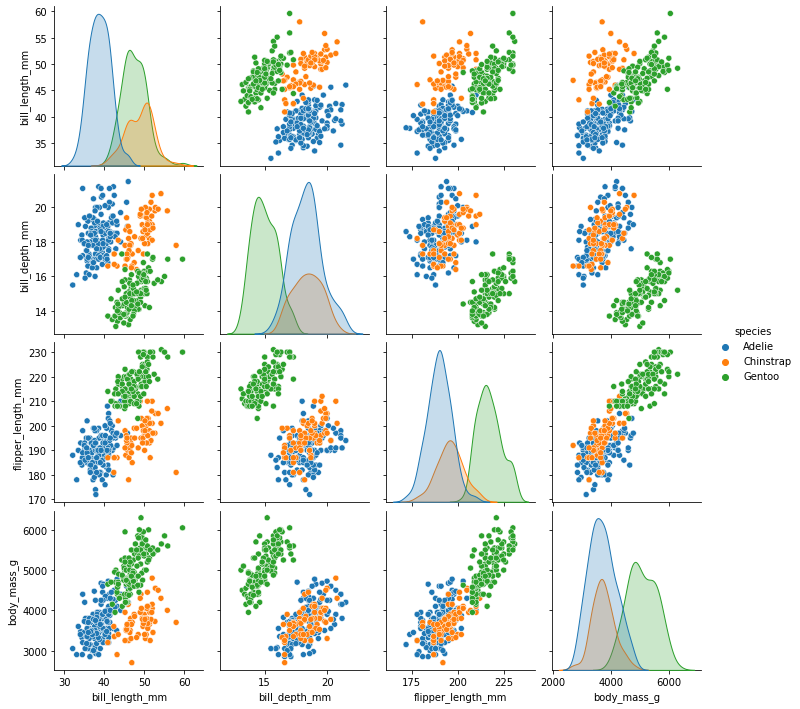

In [57]:
sns.pairplot(data=penguins, hue="species")

In [58]:
tips = sns.load_dataset("tips")

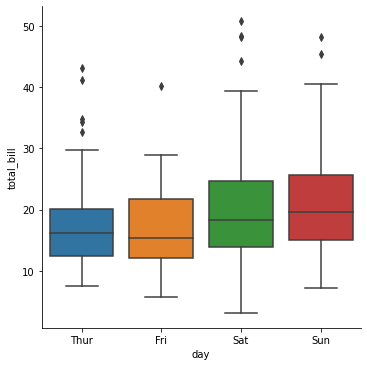

In [59]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

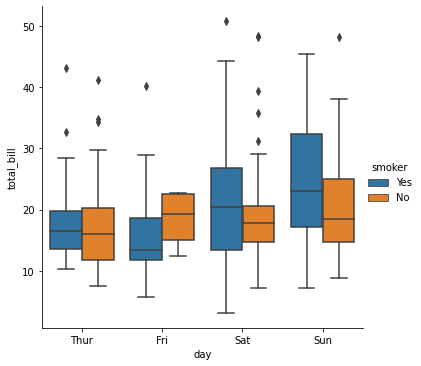

In [60]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)